# HW 7: Design a Controller

We are going to control the motion of a rectangular "paddle" by implementing a position-velocity controller.

The pose of the paddle can be described as $(x,y,\theta)$. Where $x,y$ describe the center of mass coordinate.

Thus, the state of the control problem is ${\bf x} = (x, y, \theta, \dot x, \dot y, \dot \theta)$


The control inputs are $(u_x, u_y, u_{th}) = (F_{app_x}, F_{app_y},\tau_{app})$.

* The forces $(F_{app_x}, F_{app_y})$ are *applied to the center of mass* and do not cause any angular acceleration.

* Similiarly, the torque $(\tau_{app})$ is an external moment *applied to the center of mass*.


The output of the controller is simply the state.


-------------------------------------

As discussed in class, this system is *decoupled*.  The control problem can be seperated into the horizontal control problem, vertical control problem, and rotational control problem.

Hit the play button to run a simulation.  A screen should pop up where the position of the paddle is relatively stable.  

If you look at the code in the `closedLoopController` function, you will see that the only control input is $u_y=K_{p_y} \cdot g = m\cdot g$.  Contrary to the function name, this is a feed forward controller that applies a force upwards to counteract gravity.  

Your job is to modify the code in this function to implement a position-velocity controller. 


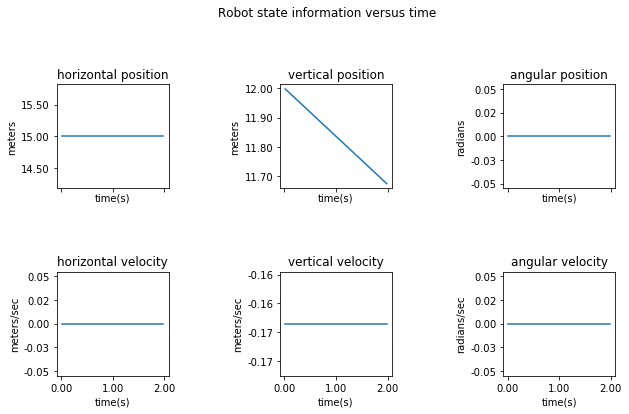

In [12]:
import tutorial; reload(tutorial); from tutorial import *

# starting position of the paddle at t=0
initial_pose = (15, 12, 0.0)

# desired position of the paddle (reference signal)
desired_pose = (15, 12, 0.0)

# desired velocity of the paddle (reference signal).  
# when this is set to 0 we want the paddle to stop at our desired_pose.
desired_vel = (0, 0, 0)     

# our desired state specifies a pose and velocity of the paddle (x,y,th,dx,dy,dth)
desired_state = desired_pose + desired_vel

# system parameters (do not change)
m = bodies['robot'].mass
I = bodies['robot'].inertia
g = 9.81

# example gain parameter for vertical proportion control
K_py = m*1


def closedLoopController (time, robot_state):
    
    # the output signal
    x, y, th, xdot, ydot, thdot = robot_state
    
    # the reference signal
    rx, ry, rth, rxdot, rydot, rthdot = desired_state 

    # the controller output
    u_x = 0         #F_app_x
    u_y = K_py*g    #F_app_y currently set to adjust for gravity
    u_th = 0        #\tau_app
    
    return u_x, u_y, u_th 

result = run_pd_control(initial_pose, closedLoopController)
plot(result, "Robot")